In [1]:
import warnings
warnings.filterwarnings('ignore', message='Lazy modules are a new feature under heavy development')

In [2]:
from diffuse import DIFFUSE
from data_loader import DataLoader
from sklearn.decomposition import PCA
from sklearn.metrics import v_measure_score
import matplotlib.pyplot as plt

Xo, X, y = DataLoader(dataset_name="PAMAP").sample_dataset(n_classes=5)
print(f"Xo: {Xo.shape} \nX: {X.shape} \ny: {y.shape}")

Xo: torch.Size([890, 51, 100]) 
X: torch.Size([890, 255]) 
y: torch.Size([890])


In [3]:
model = DIFFUSE(k=5, lmd=0.01)
model.fit(X)
y_hat_1 = model.predict(X)

v = v_measure_score(y, y_hat_1)
print("V-Measure:", v)

V-Measure: 0.7550453809500235


In [4]:
model = DIFFUSE(k=5, lmd=0.01)
model.fit(X, Xo)
y_hat_2 = model.predict(X, Xo)

v = v_measure_score(y, y_hat_2)
print("V-Measure:", v)

V-Measure: 0.8678480587329741


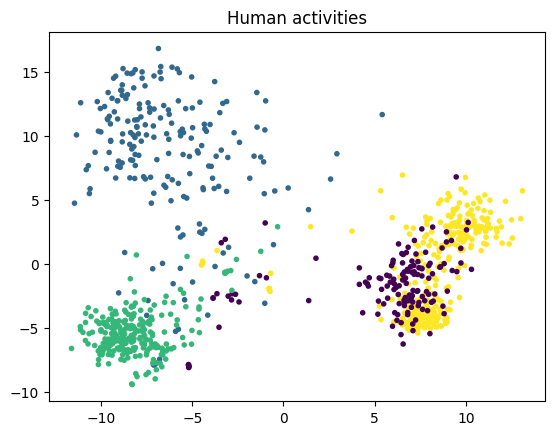

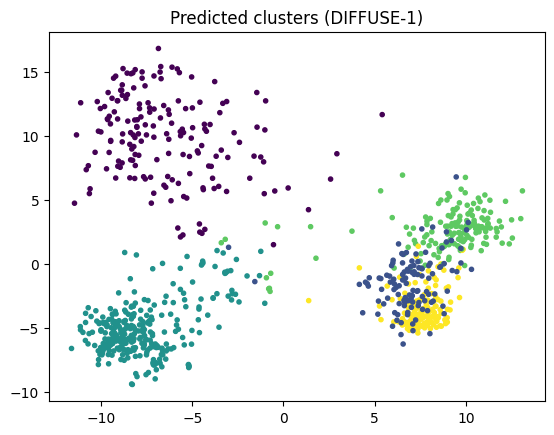

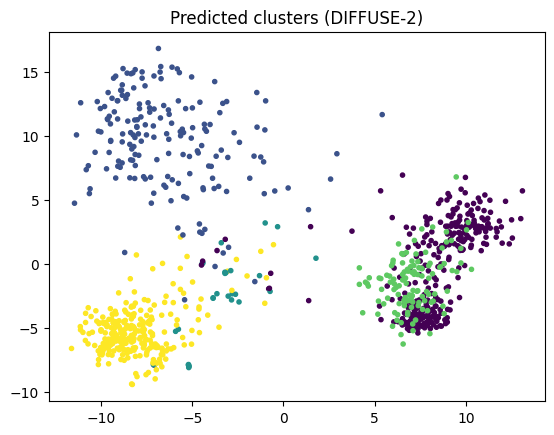

In [5]:
X_viz = PCA(n_components=2).fit_transform(X)

plt.scatter(X_viz[:, 0], X_viz[:, 1], c=y, marker=".")
plt.title("Human activities")
plt.show()

plt.scatter(X_viz[:, 0], X_viz[:, 1], c=y_hat_1, marker=".")
plt.title("Predicted clusters (DIFFUSE-1)")
plt.show()

plt.scatter(X_viz[:, 0], X_viz[:, 1], c=y_hat_2, marker=".")
plt.title("Predicted clusters (DIFFUSE-2)")
plt.show()